# Exploring the Implications of Superluminal Speeds on Causality

In this notebook, we will explore how different speeds of communication and movement affect the perception of events and the concept of causality in special relativity. We will consider scenarios where a message is sent between two observers, Alice and Bob, and a third observer, Charlie, is moving at different speeds relative to them.

### Key Concepts Covered:
- Subluminal (less than the speed of light) scenarios
- Light-speed scenarios
- Superluminal (faster than the speed of light) scenarios
- Causality and its potential violations


## 2. Input Parameters and Setup

Let's start by defining the parameters for our exploration:
- **Message Speed**: The speed at which the message is sent between Alice and Bob.
- **Charlie's Speed**: The speed at which Charlie is moving relative to Alice and Bob.
- **Distance**: The spatial separation between Alice and Bob.


In [1]:
# Constants
c = 1  # Speed of light in natural units (light-years per year)

# User Inputs
message_speed = 2  # Speed of the message as a multiple or fraction of c
charlie_speed = 0.8  # Speed of Charlie as a multiple or fraction of c
distance = 4  # Distance between Alice and Bob in light-years


## 3. Lorentz Transformation Function

This function handles different cases of speed, including subluminal, light-speed, and superluminal scenarios. It calculates the Lorentz factor and transforms the time coordinates accordingly.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, HTML

def lorentz_transform(t, x, v):
    if v == c:
        # Special case: At the speed of light, gamma becomes infinite (division by zero), need special handling
        gamma = np.inf
        t_prime = gamma * (t - (v * x) / c ** 2)
    elif v < c:
        # Sublight speed, everything is real
        gamma = 1 / np.sqrt(1 - (v / c) ** 2)
        t_prime = gamma * (t - (v * x) / c ** 2)
    else:
        # Superluminal speed, handle complex gamma
        gamma = 1 / np.lib.scimath.sqrt(1 - (v / c) ** 2)
        t_prime = gamma * (t - (v * x) / c ** 2)
    
    return t_prime, gamma


## 4. Calculate and Visualize Results

Now we will calculate the transformed time coordinates in both Alice's and Charlie's reference frames and visualize the results. This section will also check for potential causality violations.


In [3]:
def calculate_and_plot(message_speed, charlie_speed, distance):
    # Event times in Alice's frame
    t0_alice = 0
    t1_alice = distance / (message_speed * c)  # Time for message to reach Bob
    t2_alice = t1_alice + distance / (message_speed * c)  # Time for Bob's reply to reach Alice
    
    # Event positions
    x0_alice = 0
    x1_bob = distance
    x2_alice = 0
    
    # Event times in Charlie's frame using the Lorentz transformation
    t0_charlie, gamma = lorentz_transform(t0_alice, x0_alice, charlie_speed)
    t1_charlie, _ = lorentz_transform(t1_alice, x1_bob, charlie_speed)
    t2_charlie, _ = lorentz_transform(t2_alice, x2_alice, charlie_speed)
    
    # Determine which part of the time is relevant: real or imaginary
    if charlie_speed <= c:
        # For sub-light or light speed, use real part for plotting
        t0_charlie_plot = np.real(t0_charlie)
        t1_charlie_plot = np.real(t1_charlie)
        t2_charlie_plot = np.real(t2_charlie)
        time_label = "Real Time (years)"
    else:
        # For superluminal speeds, plot the imaginary part
        t0_charlie_plot = np.imag(t0_charlie)
        t1_charlie_plot = np.imag(t1_charlie)
        t2_charlie_plot = np.imag(t2_charlie)
        time_label = "Imaginary Time (years)"
    
    # Determine dynamic ranges based on the minimum and maximum time values in both frames
    t_min = min(t0_alice, t1_alice, t2_alice, t0_charlie_plot, t1_charlie_plot, t2_charlie_plot) - 1  # Adding margin
    t_max = max(t0_alice, t1_alice, t2_alice, t0_charlie_plot, t1_charlie_plot, t2_charlie_plot) + 1  # Adding margin
    x_max = distance
    
    # Determine colors for events in Charlie's frame
    color_t1_charlie = 'red' if t1_charlie_plot <= t0_charlie_plot else 'orange'
    color_t2_charlie = 'red' if t2_charlie_plot <= t1_charlie_plot else 'orange'
    
    # Create subplots for side-by-side comparison
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot in Alice's frame (real-world scenario)
    axs[0].plot([0, distance], [t0_alice, t1_alice], 'k-', label="Message (Alice to Bob)")
    axs[0].plot([distance, 0], [t1_alice, t2_alice], 'k-', label="Message (Bob to Alice)")
    axs[0].scatter([0, distance, 0], [t0_alice, t1_alice, t2_alice], color='red', s=100, label="Events in Alice's Frame")
    
    # Charlie's path in Alice's frame
    x_charlie = np.linspace(0, distance, 500)
    t_charlie = np.real(x_charlie / charlie_speed)  # Since t = x / v for straight line motion, ensure real part only
    axs[0].plot(x_charlie, t_charlie, 'g--', label="Charlie's Path in Alice's Frame")
    
    axs[0].set_xlim(0, x_max)
    axs[0].set_ylim(t_min, t_max)
    axs[0].set_xlabel('Space (light-years)')
    axs[0].set_ylabel('Time (years)')
    axs[0].set_title("Spacetime Diagram in Alice's Frame")
    axs[0].legend()
    axs[0].grid(True)
    
    # Plot in Charlie's frame (can be real or imaginary time based on speed)
    axs[1].plot([0, distance], [t0_charlie_plot, t1_charlie_plot], 'k-', label="Message (Alice to Bob)")
    axs[1].plot([distance, 0], [t1_charlie_plot, t2_charlie_plot], 'k-', label="Message (Bob to Alice)")
    axs[1].scatter(0, t0_charlie_plot, color='orange', s=100, label="Alice Sends (Charlie's Frame)")
    axs[1].scatter(distance, t1_charlie_plot, color=color_t1_charlie, s=100, label="Bob Receives (Charlie's Frame)")
    axs[1].scatter(0, t2_charlie_plot, color=color_t2_charlie, s=100, label="Alice Receives (Charlie's Frame)")
    
    axs[1].set_xlim(0, x_max)
    axs[1].set_ylim(t_min, t_max)
    axs[1].set_xlabel('Space (light-years)')
    axs[1].set_ylabel(time_label)
    axs[1].set_title("Spacetime Diagram in Charlie's Frame")
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Display the results and check for causality violation using the relevant time part
    display(Math(f"\\text{{Hypothetical Lorentz Factor }}: \\gamma = {gamma:.2f}"))
    display(Math(f"\\text{{Time of Alice sending the message (Charlie's frame)}}: t'_0 = {t0_charlie_plot:.2f} \\text{{ years}}"))
    display(Math(f"\\text{{Time of Bob receiving the message (Charlie's frame)}}: t'_1 = {t1_charlie_plot:.2f} \\text{{ years}}"))
    display(Math(f"\\text{{Time of Alice receiving Bob's reply (Charlie's frame)}}: t'_2 = {t2_charlie_plot:.2f} \\text{{ years}}"))
    
    if t1_charlie_plot <= t0_charlie_plot or t2_charlie_plot <= t1_charlie_plot:
        display(HTML(f"<p style='color:red;'><strong>Causality Violation Detected:</strong></p>"))
        if t1_charlie_plot < t0_charlie_plot:
            display(HTML(f"<p style='color:red;'>Bob receives Alice's message at <strong>{t1_charlie_plot:.2f} years</strong>, which is earlier than when Alice sends it at <strong>{t0_charlie_plot:.2f} years</strong> in Charlie's frame.</p>"))
        elif t1_charlie_plot == t0_charlie_plot:
            display(HTML(f"<p style='color:red;'>Bob receives Alice's message at the exact time <strong>{t1_charlie_plot:.2f} years</strong> when Alice sends it at <strong>{t0_charlie_plot:.2f} years</strong> in Charlie's frame, which indicates a causality issue.</p>"))
        
        if t2_charlie_plot < t1_charlie_plot:
            display(HTML(f"<p style='color:red;'>Alice receives Bob's reply at <strong>{t2_charlie_plot:.2f} years</strong>, which is earlier than when Bob receives the message at <strong>{t1_charlie_plot:.2f} years</strong> in Charlie's frame.</p>"))
        elif t2_charlie_plot == t1_charlie_plot:
            display(HTML(f"<p style='color:red;'>Alice receives Bob's reply at the exact time <strong>{t2_charlie_plot:.2f} years</strong> when Bob receives the message at <strong>{t1_charlie_plot:.2f} years</strong> in Charlie's frame, which indicates a causality issue.</p>"))
        
        display(HTML(f"<p style='color:red;'>This indicates a causality violation, as the expected order of events is not maintained.</p>"))
    else:
        display(HTML(f"<p style='color:green;'><strong>No Causality Violation Detected:</strong></p>"))
        display(HTML(f"<p style='color:green;'>All events occur in the expected order in Charlie's frame.</p>"))
        display(HTML(f"<p style='color:green;'>Bob receives Alice's message at <strong>{t1_charlie_plot:.2f} years</strong>, which is after she sends it at <strong>{t0_charlie_plot:.2f} years</strong>.</p>"))
        display(HTML(f"<p style='color:green;'>Alice receives Bob's reply at <strong>{t2_charlie_plot:.2f} years</strong>, which is after Bob receives the message at <strong>{t1_charlie_plot:.2f} years</strong>.</p>"))
        display(HTML(f"<p style='color:green;'>This means that the causal order of events is preserved, and no causality violation occurs.</p>"))


## 5. Experimenting with Different Scenarios

You can now change the values of `message_speed` and `charlie_speed` to explore different scenarios. Try setting `charlie_speed` to a value greater than `c` to observe the effects of superluminal motion, or keep it below `c` to observe how causality is maintained.

Below is the function call that allows you to run the simulation and visualization.


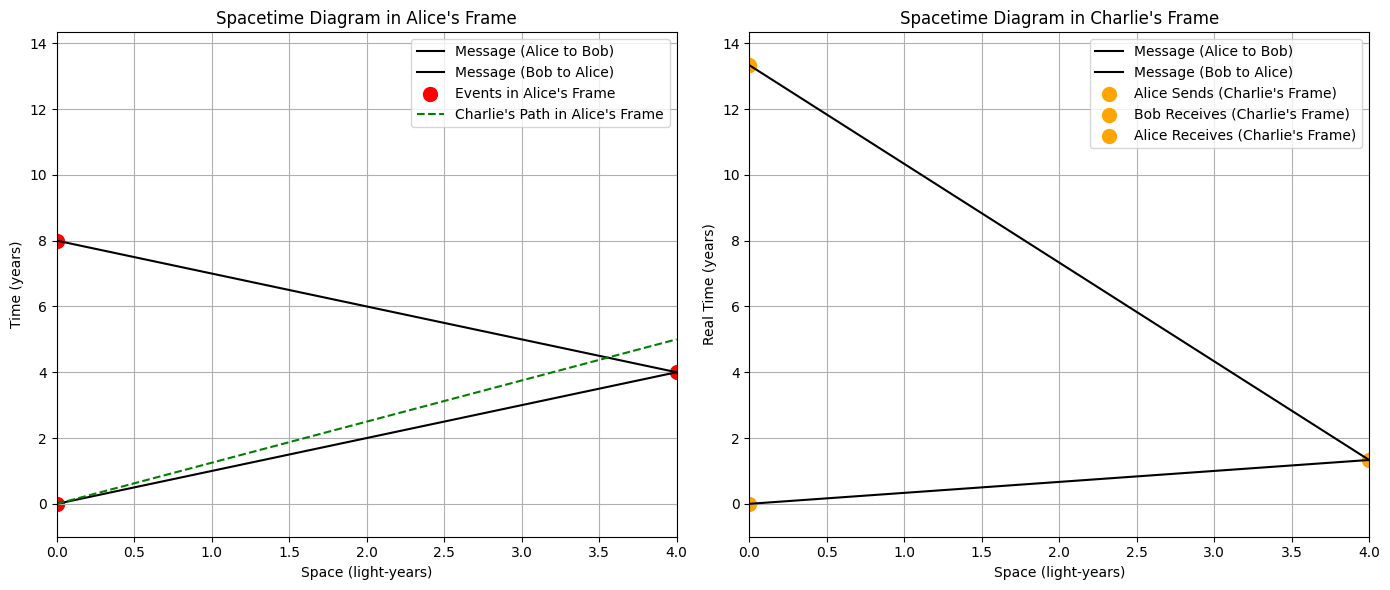

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
# Run the calculation and plot the results
calculate_and_plot(message_speed, charlie_speed, distance)


## 6. Light Cone Diagram

In this section, we will plot a light cone diagram that shows the events as they relate to the light cone structure in spacetime. The light cone represents the boundary between what can and cannot be influenced by a signal traveling at the speed of light.

### Key Elements:
- **Light Cone**: The boundary between causally connected and disconnected events.
- **Events**: The positions of Alice sending the message, Bob receiving it, and Alice receiving the reply will be shown relative to the light cone.
- **Charlie’s Path**: Charlie's movement will be plotted to show how it intersects with or diverges from the light cone, depending on his speed.


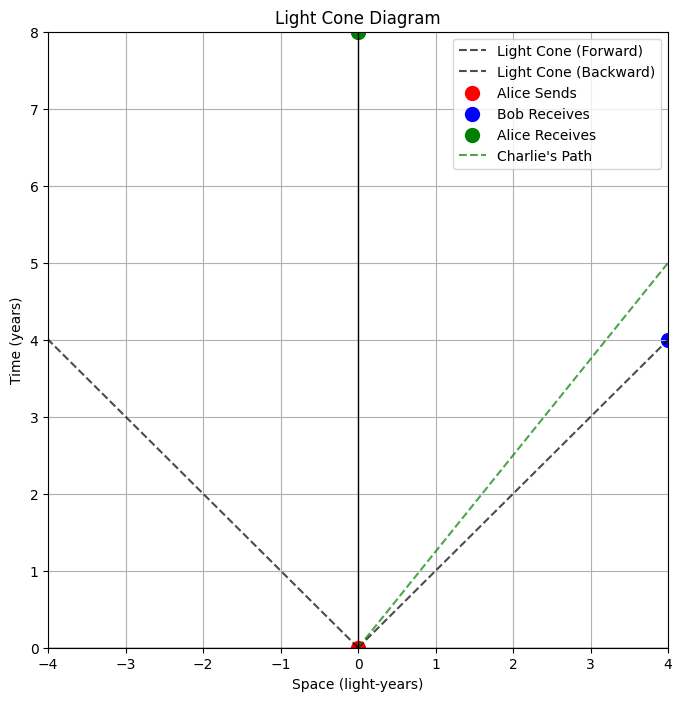

In [5]:
def plot_light_cone(message_speed, charlie_speed, distance):
    # Define time and space grid for the light cone
    time_grid = np.linspace(0, distance/c * 2, 500)
    space_grid = time_grid * c  # Light cone boundaries
    
    # Event times in Alice's frame
    t0_alice = 0
    t1_alice = distance / (message_speed * c)
    t2_alice = t1_alice + distance / (message_speed * c)
    
    # Event positions
    x0_alice = 0
    x1_bob = distance
    x2_alice = 0
    
    # Charlie's position over time
    x_charlie = np.linspace(0, distance, 500)
    t_charlie = x_charlie / charlie_speed  # Since t = x / v for straight line motion
    
    # Plotting the light cone and events
    plt.figure(figsize=(8, 8))
    
    # Plot light cone boundaries
    plt.plot(space_grid, time_grid, 'k--', label="Light Cone (Forward)", alpha=0.7)
    plt.plot(-space_grid, time_grid, 'k--', label="Light Cone (Backward)", alpha=0.7)
    
    # Plot events in Alice's frame
    plt.scatter(x0_alice, t0_alice, color='red', s=100, label="Alice Sends")
    plt.scatter(x1_bob, t1_alice, color='blue', s=100, label="Bob Receives")
    plt.scatter(x2_alice, t2_alice, color='green', s=100, label="Alice Receives")
    
    # Plot Charlie's path
    plt.plot(x_charlie, t_charlie, 'g--', label="Charlie's Path", alpha=0.7)
    
    plt.xlim(-distance, distance)
    plt.ylim(0, distance/c * 2)
    plt.xlabel('Space (light-years)')
    plt.ylabel('Time (years)')
    plt.title('Light Cone Diagram')
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the light cone plot
plot_light_cone(message_speed, charlie_speed, distance)


## 7. Conclusion

Through this notebook, we have explored how different speeds impact the perception of events and the concept of causality in special relativity. We have seen that:
- **Sub-light speeds**: Maintain causal order and result in real-valued transformations.
- **Light-speed scenarios**: Lead to extreme time dilation, challenging our usual notions of time and causality.
- **Superluminal speeds**: Result in complex-valued transformations, introducing the potential for causality violations in a hypothetical framework.

Feel free to modify the parameters and experiment further with different scenarios!
